In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('transactions.csv')

top = df[df['STATUS'] == 'OK'].sort_values(by=['SUM'], ascending=False).head(3)
print(top.loc[:,['CONTRACTOR', 'SUM']])

Umbrella = df[(df['CONTRACTOR'] == 'Umbrella, Inc') & (df['STATUS'] == 'OK')]
total_sum = Umbrella['SUM'].sum()
print('Полная сумма реально проведённых платежей в адрес Umbrella, Inc:', total_sum)

         CONTRACTOR     SUM
5085      Acme, Inc  100500
4451  Umbrella, Inc    1000
1348      Acme, Inc     999
Полная сумма реально проведённых платежей в адрес Umbrella, Inc: 925719


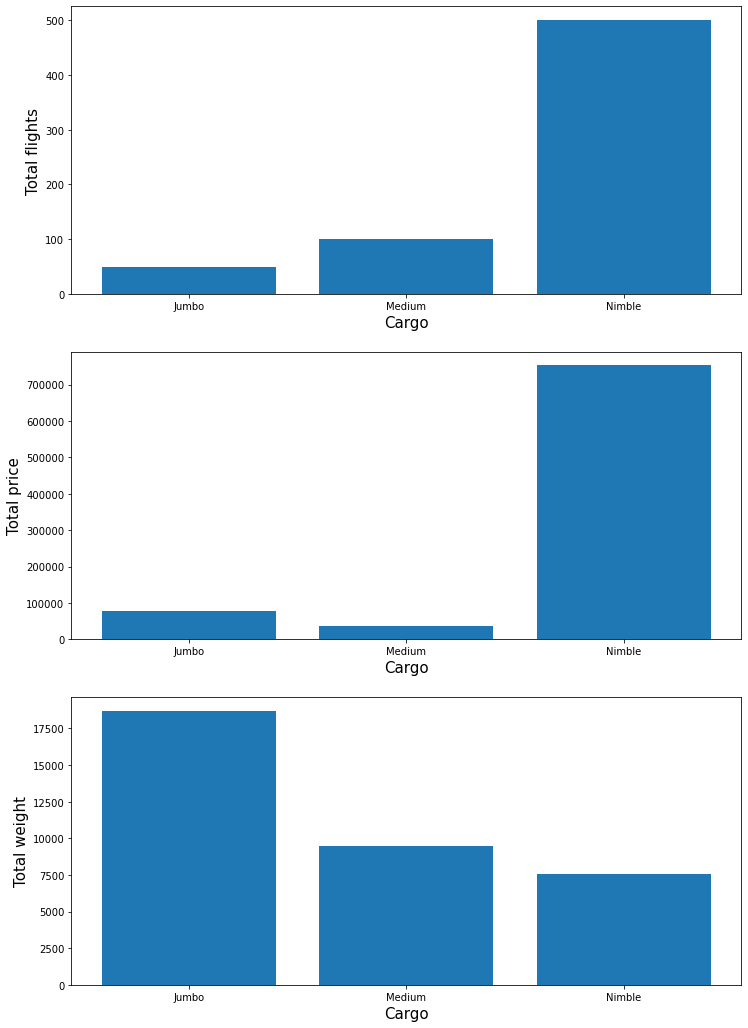

In [6]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('flights.csv').groupby('CARGO')
fig, ax = plt.subplots(3,1, figsize=[12, 18])

total_flights = df['CARGO'].count()
ax[0].set_xlabel('Cargo',fontsize = 15)
ax[0].set_ylabel('Total flights',fontsize = 15)
ax[0].bar(total_flights.index, total_flights.values)

total_price = df['PRICE'].sum()
ax[1].set_xlabel('Cargo', fontsize = 15)
ax[1].set_ylabel('Total price', fontsize = 15)
ax[1].bar(total_price.index, total_price.values)

total_weight = df['WEIGHT'].sum()
ax[2].set_xlabel('Cargo', fontsize = 15)
ax[2].set_ylabel('Total weight', fontsize = 15)
ax[2].bar(total_weight.index, total_weight.values)

fig.savefig('episode-2.png', bbox_inches = 'tight')